In this lab today, we will run the kNN model to determine the best ‘k’ value in order to determine whether a wine is of high quality. 

Use the following features: ‘density’, ‘sulphates’, residual sugar’.

Please check 'k' values from 1 to 50 in order to determine the best value.

Below is starert code which obtains demo data from Amazon Web Services website:

In [66]:
import numpy as np
import pandas as pd
import pylab as pl
from sklearn.neighbors import KNeighborsClassifier

df = pd.read_csv("https://s3.amazonaws.com/demo-datasets/wine.csv")

test_idx = np.random.uniform(0, 1, len(df)) <= 0.3
train = df[test_idx==True]
test = df[test_idx==False]

features = ['density', 'sulphates', 'residual_sugar']


In [67]:
df.sort('high_quality')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
4029,6.4,0.280,0.17,8.30,0.042,61.0,195.0,0.99577,3.22,0.46,9.4,5,white,0.0,0.0
4028,8.1,0.340,0.28,7.50,0.040,70.0,230.0,0.99558,3.14,0.55,9.8,6,white,0.0,0.0
4027,7.3,0.220,0.26,1.50,0.040,32.0,172.0,0.99194,3.27,0.48,11.2,6,white,0.0,0.0
4026,8.1,0.340,0.28,7.50,0.040,70.0,230.0,0.99558,3.14,0.55,9.8,6,white,0.0,0.0
4025,7.3,0.220,0.26,1.50,0.040,32.0,172.0,0.99194,3.27,0.48,11.2,6,white,0.0,0.0
4024,7.2,0.240,0.29,3.00,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,white,0.0,0.0
4023,6.2,0.440,0.18,7.70,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5,white,0.0,0.0
4022,7.2,0.240,0.29,3.00,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,white,0.0,0.0
4030,6.3,0.290,0.14,7.05,0.045,50.0,177.0,0.99564,3.23,0.42,9.0,5,white,0.0,0.0


In [68]:
rlist = df.sort('high_quality')

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [69]:
rlist
    

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,is_red,high_quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,1.0,0.0
4029,6.4,0.280,0.17,8.30,0.042,61.0,195.0,0.99577,3.22,0.46,9.4,5,white,0.0,0.0
4028,8.1,0.340,0.28,7.50,0.040,70.0,230.0,0.99558,3.14,0.55,9.8,6,white,0.0,0.0
4027,7.3,0.220,0.26,1.50,0.040,32.0,172.0,0.99194,3.27,0.48,11.2,6,white,0.0,0.0
4026,8.1,0.340,0.28,7.50,0.040,70.0,230.0,0.99558,3.14,0.55,9.8,6,white,0.0,0.0
4025,7.3,0.220,0.26,1.50,0.040,32.0,172.0,0.99194,3.27,0.48,11.2,6,white,0.0,0.0
4024,7.2,0.240,0.29,3.00,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,white,0.0,0.0
4023,6.2,0.440,0.18,7.70,0.096,28.0,210.0,0.99771,3.56,0.72,9.2,5,white,0.0,0.0
4022,7.2,0.240,0.29,3.00,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,white,0.0,0.0
4030,6.3,0.290,0.14,7.05,0.045,50.0,177.0,0.99564,3.23,0.42,9.0,5,white,0.0,0.0


In [70]:
rrlist = rlist[['residual_sugar', 'density', 'sulphates', 'high_quality']]

In [75]:
ndf = rrlist[rrlist['high_quality']==1]

In [79]:
ndf

,residual_sugar,density,sulphates,high_quality
5757,13.70,0.99825,0.44,1.0
5826,3.20,0.99235,0.53,1.0
2947,7.00,0.99410,0.37,1.0
5758,13.70,0.99825,0.44,1.0
5825,10.70,0.99464,0.61,1.0
2479,2.20,0.99300,0.57,1.0
37,2.10,0.99680,0.73,1.0
2946,6.30,0.99360,0.34,1.0
5760,13.70,0.99825,0.44,1.0
2475,4.20,0.98980,0.36,1.0


In [86]:
ndf[['residual_sugar', 'density', 'sulphates']].mean

<bound method DataFrame.mean of       residual_sugar  density  sulphates
5757           13.70  0.99825       0.44
5826            3.20  0.99235       0.53
2947            7.00  0.99410       0.37
5758           13.70  0.99825       0.44
5825           10.70  0.99464       0.61
2479            2.20  0.99300       0.57
37              2.10  0.99680       0.73
2946            6.30  0.99360       0.34
5760           13.70  0.99825       0.44
2475            4.20  0.98980       0.36
2431            2.70  0.99105       0.53
6439            8.90  0.99318       0.35
3436            2.20  0.99200       0.64
2840            2.10  0.99380       0.41
2830            4.50  0.99200       0.54
6395            1.10  0.99142       0.55
6394            1.10  0.99142       0.55
2943            1.90  0.99080       0.40
2944            1.10  0.99100       0.48
2831            5.85  0.99200       0.54
3413            4.10  0.99110       0.32
5823            6.50  0.99092       0.44
2478            2.20  0.9

In [73]:
pandas.rrlist

NameError: name 'pandas' is not defined

In [15]:
def calculate_distance(p, q):
    """ Calculate Euclidean distance between two points."""
    # Assume points are tuples of ([x,y],label)
    return ((p[0]-q[0])**2 + (p[1]-q[1])**2) ** 0.5

In [16]:
import collections
print(features)

def dsrs(features):
    """ Get the majority label from k neighbors."""
    # Is it possible to have a tie? How would you handle that?
    #print(labels)
    vote = collections.Counter(labels).most_common(1)[0][0]
    return vote

In [7]:
def knn_classifier(labeled_points, new_point, k):
    """ Given classified points and one new point, return a prediction based on the votes of k neighbors."""
    if k % 2 == 0:
        return "Must use odd k, to prevent ties"
    label_distances = []

    for p in labeled_points:
        #print(p[0], new_point)
        distance = calculate_distance(p[0],new_point)
        label_distances.append((distance,p[1]))
    
    label_distances.sort() # Put them in order
    #print(label_distances)
    prediction = neighbor_vote([label[1] for label in label_distances[:k]])
    return prediction

In [8]:
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split

# import data
iris = datasets.load_iris()
X = iris.data[:100, :2]  # use the first two features and just the first two classes.
y = iris.target[:100]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Split 70/30 into initial data and new points to classify
training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

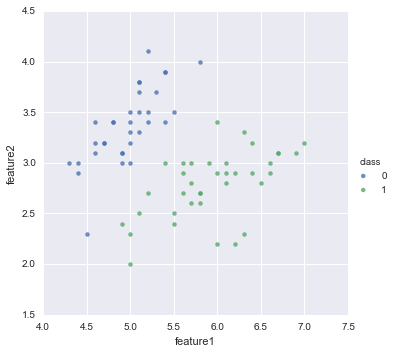

In [9]:
import matplotlib as plt
import seaborn as sns
%matplotlib inline

#plt.plot(training_df.feature1, training_df.feature2, hue = training_df['class'])
sns.lmplot('feature1', 'feature2', 
           data=training_df, 
           fit_reg=False, 
           hue="class")

In [10]:
""" Iteratively classify new points in test_df, based on the labeled points in training_df, and track your accuracy."""

#print(training_df[:5])

training = training_df.T.values.tolist()
labeled_points = zip(zip(training[1],training[2]),training[0])

#print(labeled_points[:5])

knn_classifier(labeled_points, ((6.0,2.5)),k=5)

1.0